In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')

from sqlalchemy import create_engine
import os

In [2]:
cwd = os.getcwd()
cwd_path = cwd.replace('app', '')

engine = create_engine('sqlite:///'+ cwd_path + 'data\DisasterResponse.db')
df = pd.read_sql_table('disaster_cleaned', con = engine)
df['related'] = df['related'].replace(2, 1)
df = df.drop('child_alone', axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create a plot for category counts

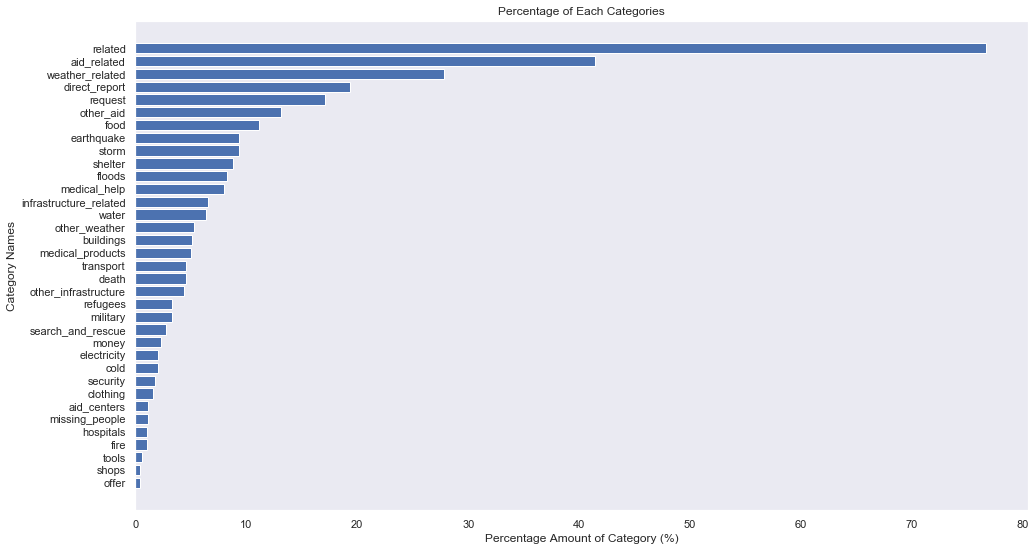

In [3]:
category_counts = df.iloc[:,4:].sum().sort_values(ascending = True)*100/len(df)
category_counts_label = category_counts.index.tolist()

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(category_counts_label, category_counts)
ax.set_title('Percentage of Each Categories')
ax.set_ylabel('Category Names')
ax.set_yticklabels(labels = category_counts_label)
ax.set_xlabel('Percentage Amount of Category (%)')

plt.show()

In [4]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
genre_group = df.groupby('related').count()
genre_group

,id,message,original,genre,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
related,,,,,,,,,,,,,,,,,,,,,
0,6122,6122,3395,6122,6122,6122,6122,6122,6122,6122,...,6122,6122,6122,6122,6122,6122,6122,6122,6122,6122
1,20094,20094,6775,20094,20094,20094,20094,20094,20094,20094,...,20094,20094,20094,20094,20094,20094,20094,20094,20094,20094
